<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/main/CV_Module_2_1_2_2_Camera_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, 2022, Sudeep Sarkar, University of South Florida, Tampa

# You will learn about



* Geometry of the pin-hole camera model and mathematical notations we will use. In particular, you will learn about the **homogenous coordinate representation**.

* World and camera coordinate systems and how they are related mathematically using a **linear transformation matrix** in the homogenous space.

* Relationship between 2D camera pixel location and 3D world coordinates. 

* Relationship between 2D points on a 3D plane and its images. This relationship is called a **homography**.

* Equation of the 2D image of a 3D line and use it to learn about vanishing points. Vanishing points play an important role in artist painting apart from computer vision!




# Module 2.1

## Camera with lens

* Inverted image
* Chromatic aberrations
* Focal length
* Pin-hole approximation of the lens


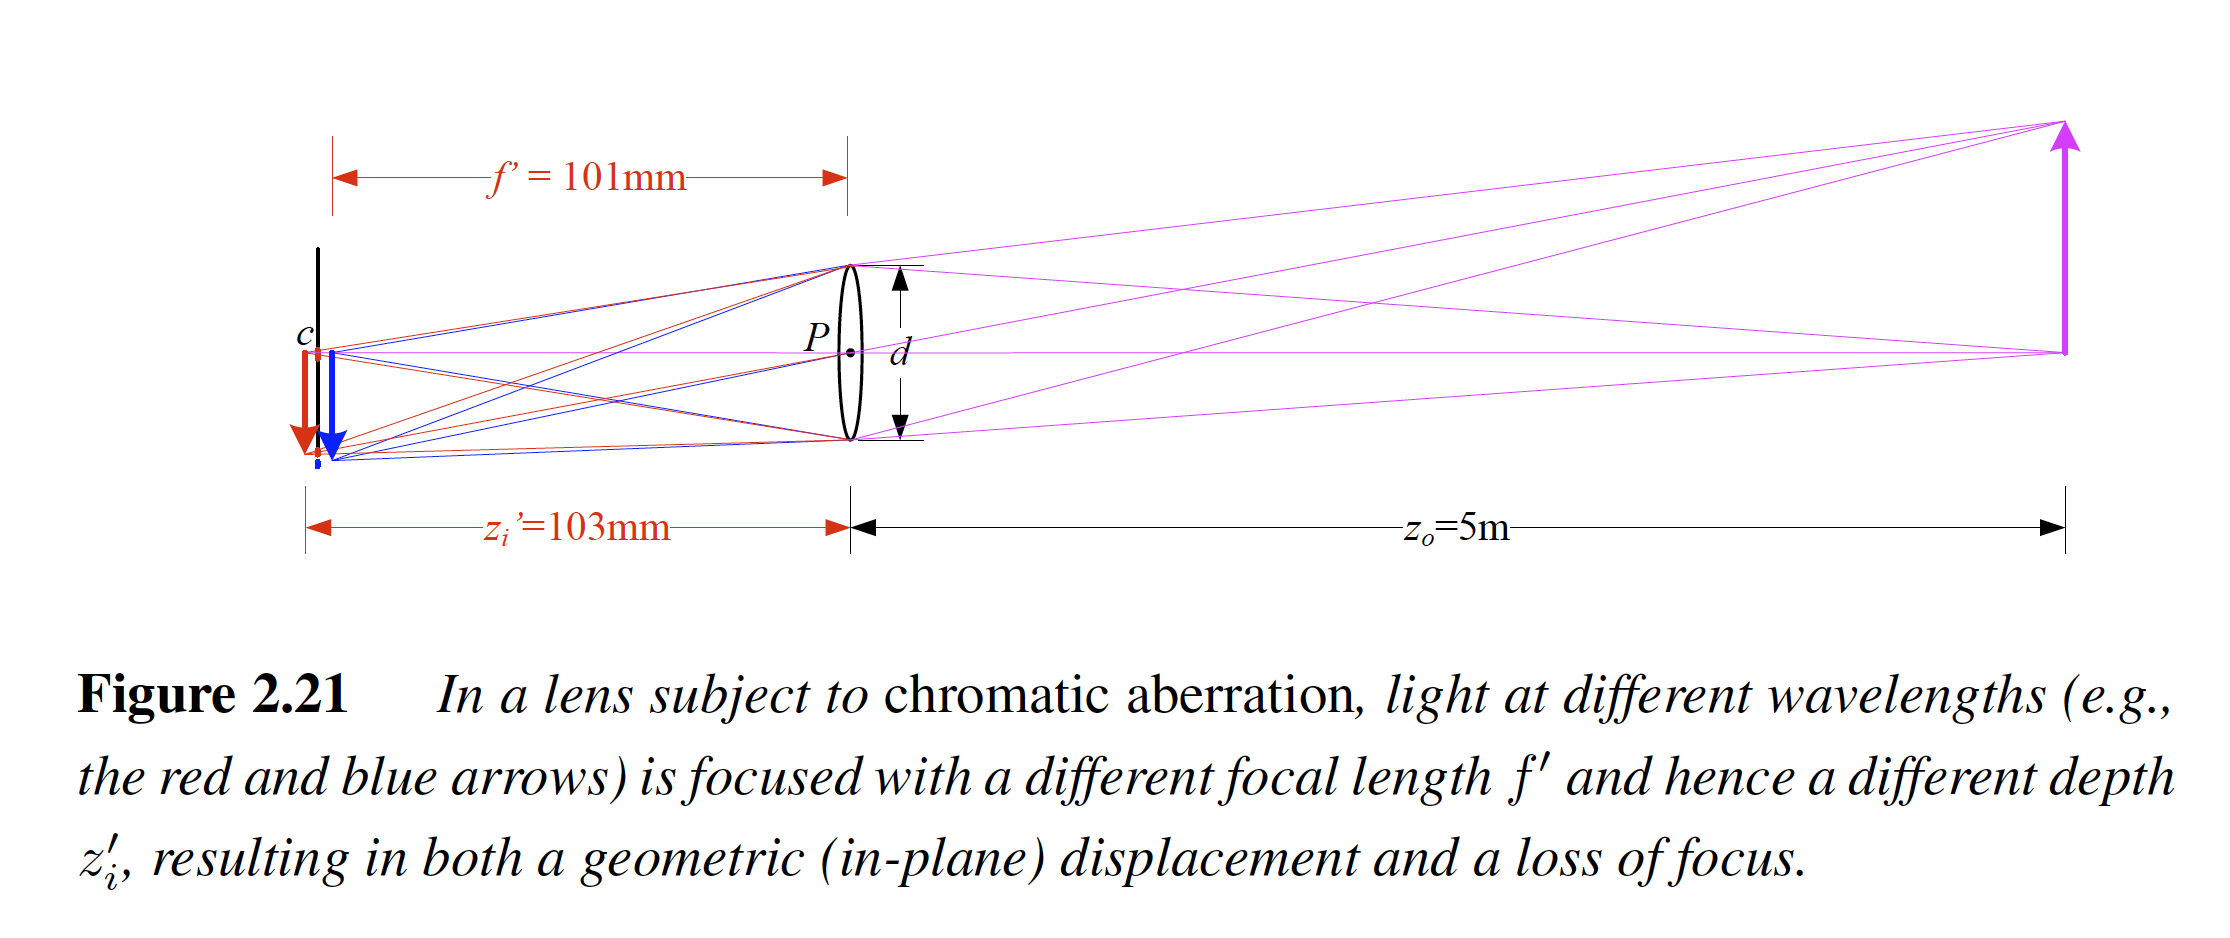

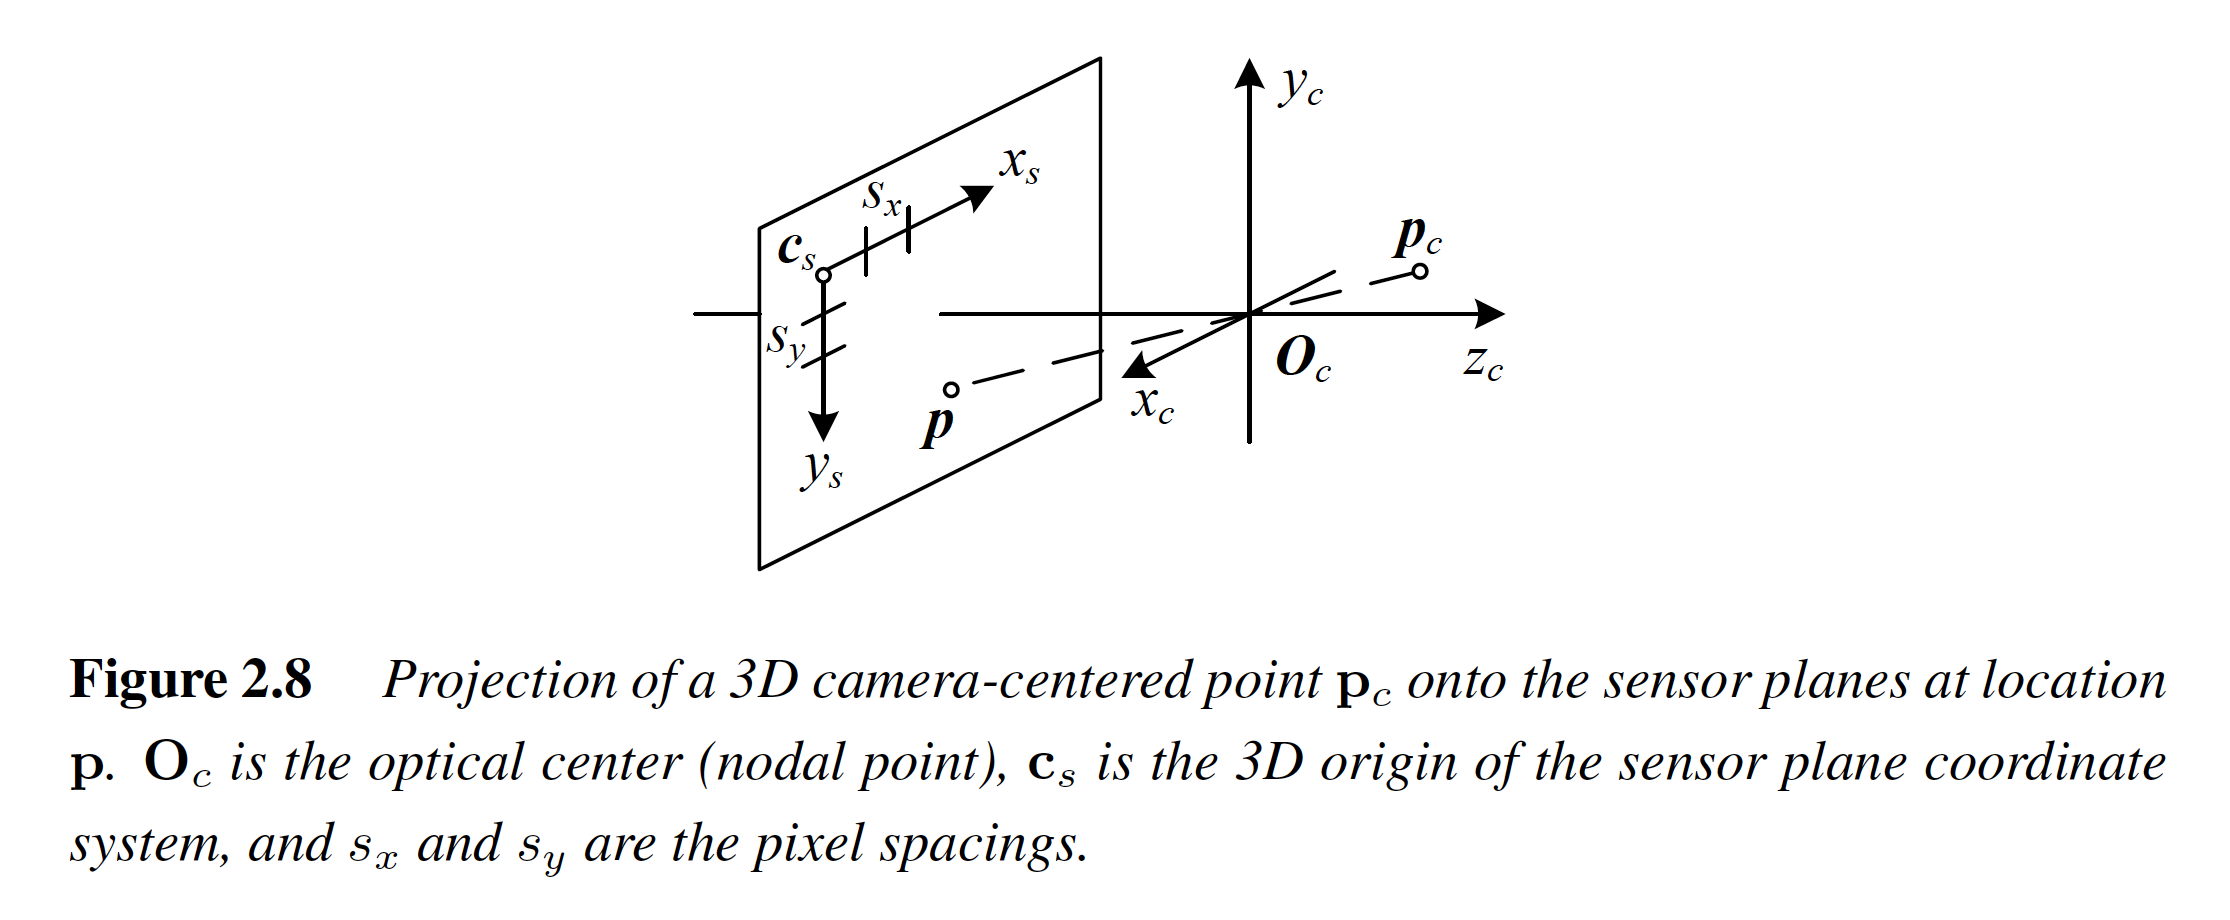

## World, camera, image plane, and image pixel coordinate systems

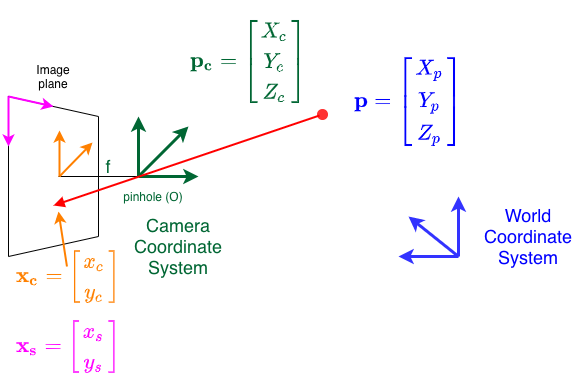

## Homogenous coordinates


* $\mathbf{\tilde{p}}$ is a 4 by 1 vector, $\begin{bmatrix} X_p \\ Y_p \\ Z_p \\ 1 \end{bmatrix}$ representing the homogeneous coordinates with respect to the world coordinates.

* $\mathbf{\tilde{p}}_c$ is a 4 by 1 vector, $\begin{bmatrix} X_c \\ Y_c \\ Z_c \\ 1 \end{bmatrix}^T$ representing the homogeneous coordinates with respect to the camera coordinates.

*  $\mathbf{\tilde{x}}_c$ is a 3 by 1 vector, $\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ representing the homogeneous coordinates of the perspective projection of the 3D point onto the image with respect to the camera coordinates. See Figure 2.9 of textbook (page 57 of pdf file).

* $\mathbf{x}_c$ is non-homogeneous coordinate corresponding to the above homogeneous coordinate $\mathbf{x}_c = \begin{bmatrix} \frac{x_1}{x_3} \\ \frac{x_2}{x_3} \end{bmatrix}$.

* $\mathbf{\hat{x}}_c$ is a 2 by 1 vector, $\begin{bmatrix} \hat{x}_c \\ \hat{y}_c \end{bmatrix}$ representing the image location after lens distortion.

* $\mathbf{x}_s$ is a 2 by 1 vector, $\begin{bmatrix} x_s \\ y_s \end{bmatrix}$ representing the image location in pixel coordinates, with respect to the rows and columns of the image array. 


## Relationship between world and camera coordinates

* What is the relationship between the world coordinates, $\mathbf{\tilde{p}}$, and the camera coordinates $\mathbf{\tilde{p}}_c$? It is a **rigid** 3D  rotation and translation relationship.

\begin{eqnarray}
    \begin{bmatrix}
    X_c \\ Y_c \\ Z_c
    \end{bmatrix} & = & 
    \begin{bmatrix}
    r_{00} & r_{01} & r_{02}  \\
    r_{10} & r_{11} & r_{12}  \\
    r_{20} & r_{21} & r_{22} 
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ Z_p
    \end{bmatrix}
    +
    \begin{bmatrix}
    t_x \\ t_y \\ t_z
    \end{bmatrix} \\ \\
    \mathbf{p}_c & = & \mathbf{R} \mathbf{p} + \mathbf{t}
\end{eqnarray}

* Rigid transformations preserve lengths and angles.

* The 3 by 3 rotation matrix $\mathbf{R}$ has some special properties.

> 1.   It maps the origin of one coordinate axes, i.e. the point (0, 0, 0), to the origin of the other coordinate axes.
> 2.   The transpose of the matrix is its inverse, $\mathbf{R}^T \mathbf{R} = \mathbf{I}$
>>  The means that the rows (and columns) of the rotation matrix are *orthogonal* to each other and each of them are of unit length, i.e. they are **orthonormal**.
> 3. The determinant of $\mathbf{R}$ is one: $\det(\mathbf{R}) = 1$.

* There are many different ways to represent a 3D rotation matrix. You are probably most familiar with the Euler angle representation. 

* **[Euler angles](https://en.wikipedia.org/wiki/Euler_angles)**: (See the nice animation in the wikipedia page) **A rotation matrix can be formed as the product of three rotations around three cardinal axes**, e.g., $x$, $y$, and $z$, or $x$, $y$, and $x$. $\mathbf{R} = \mathbf{R}_x \mathbf{R}_y \mathbf{R}_z$

* This representation has serious issues:

>>>The result depends on the order in which the transforms are applied.
>>> The space of the angles is NOT uniform, and we cannot move smoothly in the space of angles. Look up Gimble lock.

* For this class, we will stick with Euler angles, however, if you are planning to do research or write serious computer vision code, you should look up quaterion representations for rotation.

* The above transformation can be expressed compactly using homogenous coordinates as

\begin{eqnarray}
    \begin{bmatrix}
    X_c \\ Y_c \\ Z_c \\ 1
    \end{bmatrix} & = & 
    \begin{bmatrix}
    r_{00} & r_{01} & r_{02} & t_x \\
    r_{10} & r_{11} & r_{12} & t_y \\
    r_{20} & r_{21} & r_{22} & t_z \\
        0 & 0 & 0 & 1 
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ Z_p \\ 1
    \end{bmatrix} \\ \\
    \mathbf{\tilde{p}}_c & = & \mathbf{P} \mathbf{\tilde{p}}
\end{eqnarray}

> where $\mathbf{P}$ is a 4 by 4 matrix.


### Code: World coordinate to camera coordinates

Dimensions of p_tilde: (8, 4, 1)
R_x=
 [[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]] 
R_y=
 [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 
R_z=
 [[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
R=
 [[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]] 
T=
 [-2  2 20] 
P=
 [[ 1.         0.         0.        -2.       ]
 [ 0.         0.8660254 -0.5        2.       ]
 [ 0.         0.5        0.8660254 20.       ]
 [ 0.         0.         0.         1.       ]]


Text(0.5, 0.92, 'Camera coordinates')

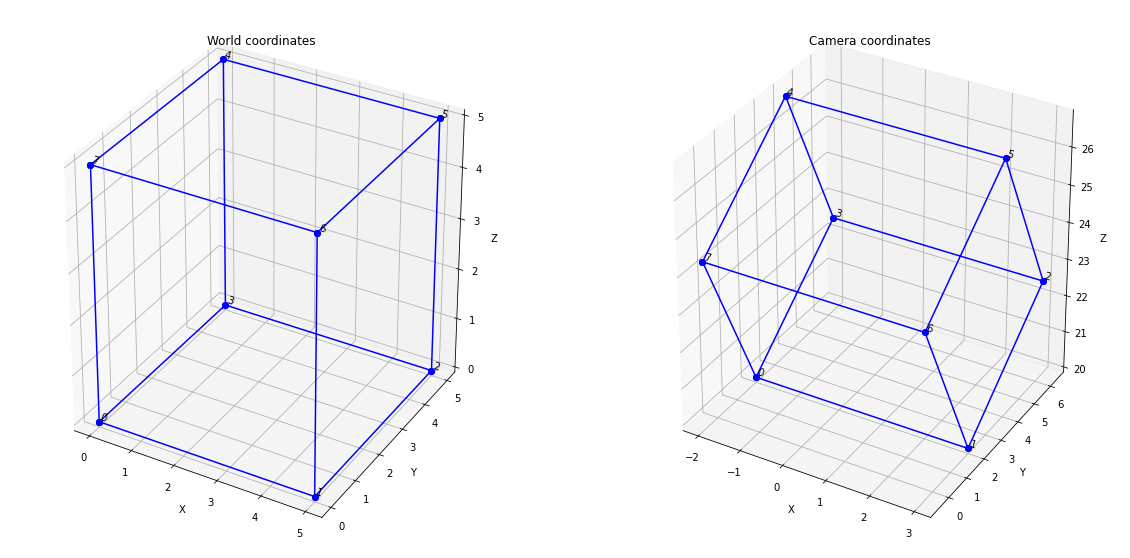

In [ ]:
''' Code to generate the 2D image locations given the 3D world coordinates, illustrated using points on a cube, '''
import numpy as np
import matplotlib.pyplot as plt

#-------------------------Some support functions------------------------------------
def rotation_euler (theta_x, theta_y, theta_z) :
# a function that returns a 3 by 3 rotation matrix given the Euler rotation angles in radians.
    R_x = np.array([[1, 0, 0], [0, np.cos(theta_x), -np.sin(theta_x)], [0, np.sin(theta_x), np.cos(theta_x)]])
    R_y = np.array([[np.cos(theta_y), 0, -np.sin(theta_y)], [0, 1, 0], [np.sin(theta_y), 0, np.cos(theta_y)]])
    R_z = np.array([[np.cos(theta_z), -np.sin(theta_z), 0], [np.sin(theta_z), np.cos(theta_z), 0], [0, 0, 1]])

    print('R_x=\n', R_x, '\nR_y=\n', R_y, '\nR_z=\n', R_z)
    return(R_x @ R_y @ R_z)

def plot_cube (axis, p_t) :
# Given 8 vertices (p_t is 8 by 4 by 1), plot the 3D cube edges and vertices
    axis.plot3D(p_t[:,0,0], p_t[:,1,0], p_t[:,2,0], c='b', marker='o')
    axis.plot3D([p_t[0,0,0], p_t[7,0,0]], [p_t[0,1,0], p_t[7,1,0]], [p_t[0,2,0], p_t[7,2,0]], c='b', marker='o')
    axis.plot3D([p_t[2,0,0], p_t[5,0,0]], [p_t[2,1,0], p_t[5,1,0]], [p_t[2,2,0], p_t[5,2,0]], c='b', marker='o')
    axis.plot3D([p_t[1,0,0], p_t[6,0,0]], [p_t[1,1,0], p_t[6,1,0]], [p_t[1,2,0], p_t[6,2,0]], c='b', marker='o')
    axis.plot3D([p_t[0,0,0], p_t[3,0,0]], [p_t[0,1,0], p_t[3,1,0]], [p_t[0,2,0], p_t[3,2,0]], c='b', marker='o')
    axis.plot3D([p_t[4,0,0], p_t[7,0,0]], [p_t[4,1,0], p_t[7,1,0]], [p_t[4,2,0], p_t[7,2,0]], c='b', marker='o')
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_zlabel('Z')
    for i in range(8):
        axis.text(p_t[i,0,0], p_t[i,1,0], p_t[i,2,0], '{}'.format(i), 'x')

#---------------------------------------------------------------
# Generate 8 vertices of a 5 by 5 by 5 sized cube with one of the vertices at origin of the world coordinates (homogenous)
N = 8
p_tilde = np.array([[0, 0, 0, 1], [5, 0, 0, 1], [5, 5, 0, 1], [0, 5, 0, 1], [0, 5, 5, 1], [5, 5, 5, 1], [5, 0, 5, 1], [0, 0, 5, 1]])
p_tilde = np.expand_dims(p_tilde, 2) # the dimension for p_tilde will change from (N by 4) to (N by 4 by 1)
print('Dimensions of p_tilde:', p_tilde.shape)
#---------------------------------------------------------------
# plot the cube, with respect to the world coordinates
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
plot_cube (ax, p_tilde)
ax.set_title('World coordinates')
#---------------------------------------------------------------
# Setup the camera rotation and translation with respect to the world coordinates
R = rotation_euler(30*np.pi/180, 0, 0)

T = np.array([-2,2,20])
P = np.eye(4)
P[0:3,0:3] = R
P[0:3,3] = T
print('R=\n', R, '\nT=\n', T, '\nP=\n', P)
#---------------------------------------------------------------
# Transform the 3D coordinates from world to camera coordinates
p_c_tilde = P @ p_tilde  # @ is matrix multiply in python

# P is 4 by 4 and p_tilde is 8 by 4 by 1, so this is not a standard matrix multiply!
# It is using a feature called broadcasting. It will effectively multiple each 
# of the 4 by 1 homogeneous point representations by the 4 by 4 matrix to 
# result in a 8 by 4 by 1 output.

'''
NUMPY BROADCASTING -- very important feature

https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm

https://numpy.org/devdocs/user/basics.broadcasting.html
'''

#---------------------------------------------------------------
# plot the points in camera coordinates
ax = fig.add_subplot(1,2,2, projection='3d')
plot_cube (ax, p_c_tilde)
ax.set_title('Camera coordinates')



## Pin hole camera model

https://en.wikipedia.org/wiki/Pinhole_camera_model

* What is the relationship between $\mathbf{\tilde{p}}_c$ and $\mathbf{\tilde{x}}_c$? The focal length is denoted by $f$.
    
* Consider a pinhole camera model with forward projection. The image plane is at $Z_c=f$. A ray through the image pixel $(x_c, y_c)$ is denoted by the vector : $\begin{bmatrix}
        x_c \\ y_c \\ f 
\end{bmatrix}$. 

* This ray should pass through $\mathbf{\tilde{x}}_c$. Mathematically speaking, there exists some constant, $k$, such that

\begin{equation}
    \begin{bmatrix}
        x_c \\ y_c\\ f
    \end{bmatrix} = k
    \begin{bmatrix}
        X_c \\ Y_c\\ Z_c
    \end{bmatrix}
\end{equation}

* We can eliminate $k$ using the equality of the last component, $k = \frac{f}{Z_c}$. Using this, we can write.

\begin{eqnarray}
    x_c & = & f\frac{X_c}{Z_c} \\
    y_c & = & f\frac{Y_c}{Z_c} 
\end{eqnarray}

* In homogeneous coordinates, this can be written as:

\begin{equation}
    \begin{bmatrix}
    x_1 \\ x_2 \\ x_3 
    \end{bmatrix} = 
    \begin{bmatrix}
    f & 0 & 0 & 0 \\
    0 & f & 0 & 0 \\
    0 & 0 & 1 & 0
    \end{bmatrix}
    \begin{bmatrix}
    X_c \\ Y_c \\ Z_c \\ 1
    \end{bmatrix}  
\end{equation}

 \begin{equation} 
    \begin{bmatrix} x_c \\  y_c \end{bmatrix} =
    \begin{bmatrix} 
      x_1/x_3  \\ x_2/x_3
    \end{bmatrix}
\end{equation}

**Note the scale uncertainty in the transformation. If we scale the world, we get the same image!** So, it is possible recover only relative measurements, not absolute measurements, just from images. We will need to some ground measurements of some object that we see in the images to make absolute measurements. We can recover the world only upto a scale.

### Code: Pin hole camera projection: 3D camera coordinates to 2D image plane

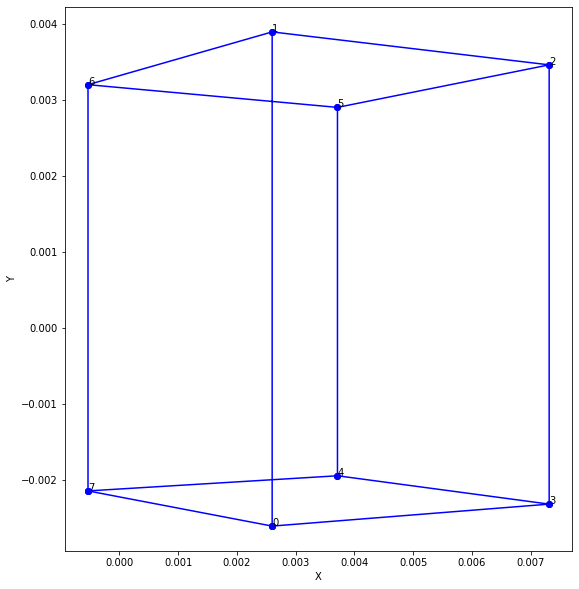

In [ ]:
# ---------Utility function to draw the sides of a cube in 2 dimensions
def plot_cube_2D (axis, y, x) :
# Given 8 vertices (p_t is 8 by 4 by 1), plot the 3D cube edges and vertices
    axis.plot(y, x, c='b', marker='o')
    axis.plot([y[0], y[7]], [x[0], x[7]], c='b', marker='o')
    axis.plot([y[2], y[5]], [x[2], x[5]], c='b', marker='o')
    axis.plot([y[1], y[6]], [x[1], x[6]], c='b', marker='o')
    axis.plot([y[0], y[3]], [x[0], x[3]], c='b', marker='o')
    axis.plot([y[4], y[7]], [x[4], x[7]], c='b', marker='o')

    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    for i in range(8):
        axis.text(y[i], x[i], '{}'.format(i))


#--------------------------------------------

'''Perspective projection'''
f = 0.026  # in meters -- iphone 11 camera focal length = 26 mm
x = np.array([[f, 0, 0, 0], [0, f, 0, 0], [0, 0, 1, 0]]) @ p_c_tilde
x_c = x[:,0]/x[:,2]
y_c = x[:,1]/x[:,2]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
plot_cube_2D (ax, y_c, x_c)





## Pixel coordinates

What is the relationship between the image pixel coordinates, $\mathbf{x}_s$, and $\mathbf{\hat{x}}_c$? The  pixel sensor size is $s_x$ by $s_y$, and the optical center is denoted by $(c_x, c_y)$, in pixel coordinates. These parameters are typically mentioned in technical manuals of the cameras. For most modern cameras, $(c_x, c_y)$ is the center of the image and pixels are typically square shaped.
    
\begin{equation} 
\begin{bmatrix} 
x_s \\ y_s \\ 1 
\end{bmatrix} =
\begin{bmatrix} 
-\frac{1}{s_x} & 0 & c_x \\ 
0 & -\frac{1}{s_y}  & c_y \\
0 & 0 & 1
\end{bmatrix} 
\begin{bmatrix}
\hat{x}_c \\ \hat{y}_c \\ 1
\end{bmatrix}
\end{equation}

The signs can be used to take into account the axes handedness as needed.



    

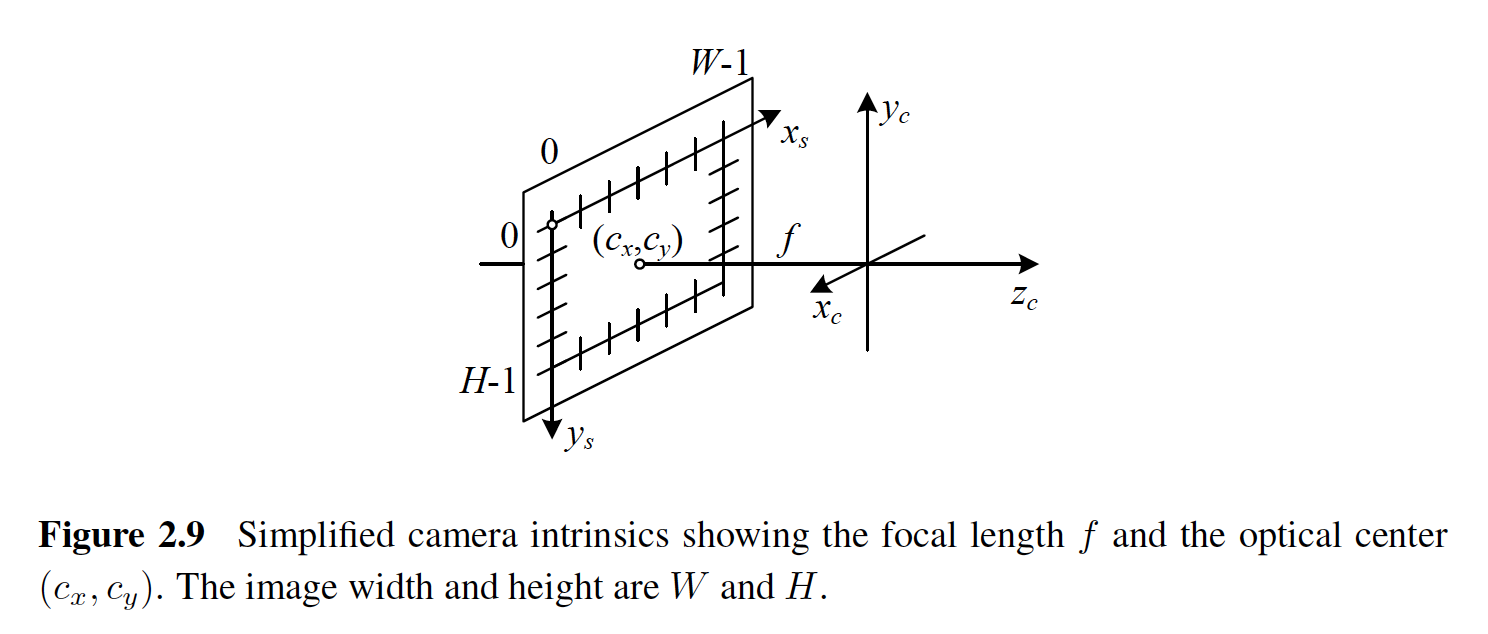

### Code: 2D image plane to 2D pixel coordinates

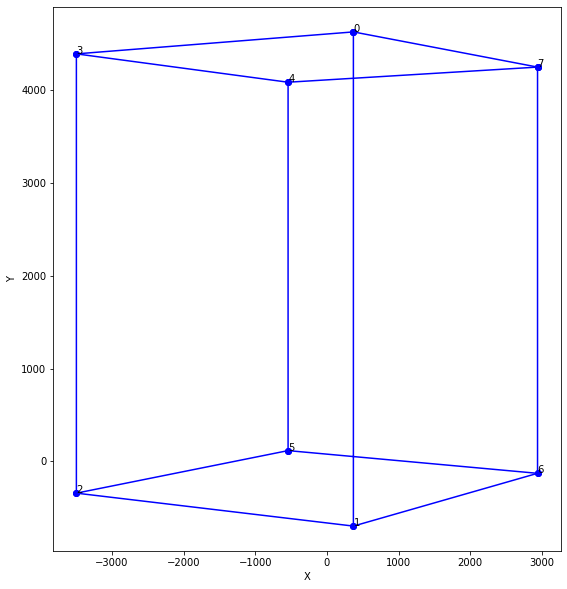

In [ ]:
c_x = 2500
c_y = 2500
s_x = 1.22e-6  # 1.22 microns https://www.ephotozine.com/article/complete-guide-to-image-sensor-pixel-size-29652
s_y = 1.22e-6   # 1.22 microns
x_s = -x_c/s_x + c_x
y_s = - y_c/s_y + c_y


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
plot_cube_2D (ax, y_s, x_s)


# Module 2.2

## Camera model (without lens distortion)

Without the lens distortion,  the transformation of the 3D point to the image point (in homogeneous coordinates) is given as a product of a 3 by 3 intrinsic camera parameter $\mathbf{K}$ and a 3 by 4 extrinsic parameter matrix composed of a 3 by 3 rotation matrix, $\mathbf{R}$, and a 3 by 1 translation vector $\mathbf{t}$.
\begin{eqnarray} 
    \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} & = &
    \begin{bmatrix} -\frac{f}{s_x} & 0 & c_x  & 0\\ 0 & -\frac{f}{s_y} & c_y & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix}
    \begin{bmatrix} 
    r_{00} & r_{01} & r_{02} & t_x \\ 
    r_{10} & r_{11} & r_{12} & t_y \\
    r_{20} & r_{21} & r_{22} & t_z \\
    0 & 0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ Z_p \\ 1
    \end{bmatrix} \\ \\
    \mathbf{\tilde{x}}_c & = & \mathbf{K} \begin{bmatrix} \mathbf{R} & | &\mathbf{t} \end{bmatrix} \mathbf{\tilde{p}} 
\end{eqnarray}

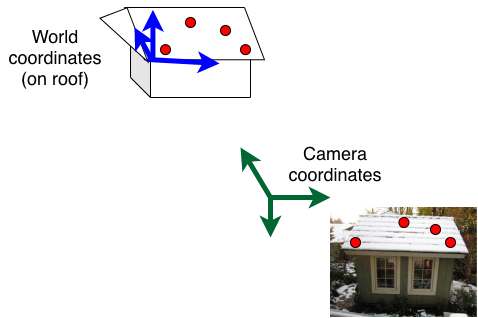

## Points on a 2D plane in 3D

Consider points on the plane $Z_p = 0$. The image points will be related to coordinates on the plane using a homography as follows.

\begin{eqnarray} 
    \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} & = &
    \begin{bmatrix} -\frac{f}{s_x} & 0 & c_x & 0\\ 0 & -\frac{f}{s_y} & c_y & 0\\ 0 & 0 & 1 & 0 \end{bmatrix}
    \begin{bmatrix} 
    r_{00} & r_{01} &  t_x \\ 
    r_{10} & r_{11} &  t_y \\
    r_{20} & r_{21} &  t_z \\
    0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ 1
    \end{bmatrix} \\
    & = &
    \begin{bmatrix} -\frac{f}{s_x} & 0 & c_x\\ 0 & -\frac{f}{s_y} & c_y \\ 0 & 0 & 1 \end{bmatrix}
    \begin{bmatrix} 
    r_{00} & r_{01} &  t_x \\ 
    r_{10} & r_{11} &  t_y \\
    r_{20} & r_{21} &  t_z 
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ 1
    \end{bmatrix} \\
    & = &
    \begin{bmatrix} - & - & - &\\
    - & - & - &\\
    - & - & - &
    \end{bmatrix}
    \begin{bmatrix}
    X_p \\ Y_p \\ 1
    \end{bmatrix} \\ \\
    \mathbf{\tilde{x}_c} & = & \mathbf{H}^{3 \times 3} \mathbf{\tilde{x}_p}
\end{eqnarray}

Thus, points on a plane whose coordinates are specified with respect to the plane are related to the image points using a homography. 




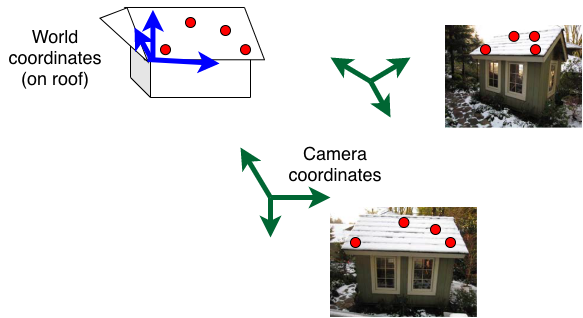

## Points on one plane from multiple cameras

Now let us consider two cameras looking at a plane, like two views of the roof of the shed in the image above or the floor of a room or a soccer field.

The homography relating the image points for the individual cameras are given by

\begin{eqnarray}
 \mathbf{\tilde{x}_{1c}} & = & \mathbf{H_1} \mathbf{\tilde{x}_{p}} \\
 \mathbf{\tilde{x}_{2c}} & = & \mathbf{H_2} \mathbf{\tilde{x}_{p}} 
\end{eqnarray}

Note $\mathbf{\tilde{x}_{p}} =  \begin{bmatrix}
    X_p \\ Y_p \\ 1
    \end{bmatrix} $

We can directly relate the image pixel in the two images directly, by inverting one of the equations and plugging into the other.
\begin{eqnarray}
    \mathbf{\tilde{x}_{p}} & = & \mathbf{H_2}^{-1} \mathbf{\tilde{x}_{2c}} \\
    \mathbf{\tilde{x}_{1c}} & = & \mathbf{H_1} \mathbf{H_2}^{-1} \mathbf{\tilde{x}_{2c}}
\end{eqnarray}
 
Assuming the homographies are invertible, which will be case unless we are viewing the plane under degenerate conditions, the image points will be related through a linear homography.

## Image of a line

* We will study the behavior of sets of lines under projective transform. 
* To keep the mathematics simple, we will consider the 3D coordinates in terms of the camera coordinates, not world coordinates. Specifications with respect to world coordinates is easily handled by converting into camera coordinates first.

* The resulting image coordinates are with respect to the image plane's center, not in terms of image pixel array coordinates.

* A line can be parameterized by a point on the line, $\begin{bmatrix} x_0 \\ y_0\\ z_0 \end{bmatrix} $
and the unit direction vector (also called direction cosines), $\begin{bmatrix}
        a \\ b \\ c
\end{bmatrix}$ along the line. 

* Any point on the lines can be expressed as a scaled version of the unit vector, anchored at a point on the line.
    
\begin{eqnarray}
   \begin{bmatrix}
        x\\y\\z
    \end{bmatrix} = \begin{bmatrix}
        x_0 \\ y_0\\ z_0
    \end{bmatrix} + \lambda \begin{bmatrix}
        a \\ b \\ c
    \end{bmatrix} 
\end{eqnarray}

* The parameter $\lambda$ represents the distance along the line ranges from $-\infty$ and $\infty$. If we restrict the value of $\lambda$ to a range, we get a line segment.

* The image of a point in this line will be given by
\begin{eqnarray}
    x_c & = & f \frac{x_0 + \lambda a}{z_0 + \lambda c} \\
    y_c & = & f \frac{y_0 + \lambda b}{z_0 + \lambda c} \\
\end{eqnarray}

* When $\lambda \rightarrow \infty$, we get the point at infinity on this line. The image of this point at infinity will be given by

\begin{eqnarray}
    x_{\infty} & = & \lim_{\lambda \rightarrow \infty} f \frac{x_0/\lambda + a}{z_0/\lambda + c}  = f \frac{a}{c} \\
    y_{\infty} & = & \lim_{\lambda \rightarrow \infty} f \frac{y_0/\lambda + b}{z_0/\lambda + c} = f \frac{b}{c}\\
\end{eqnarray}

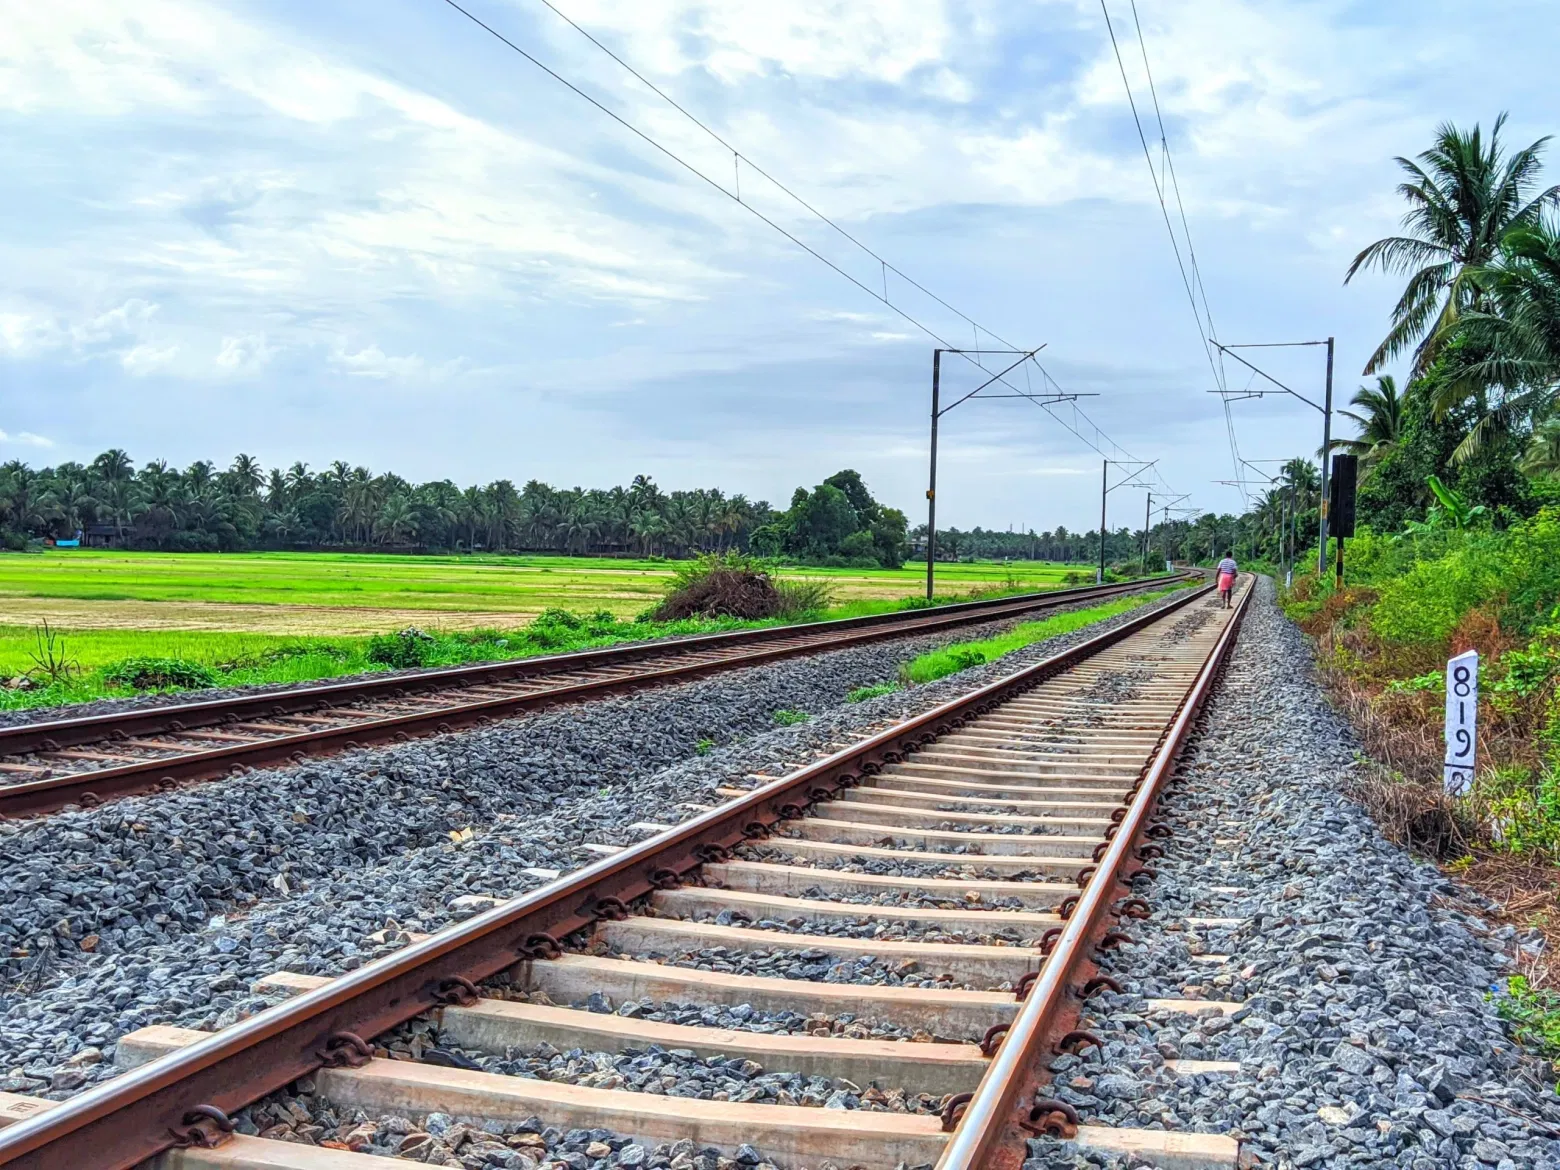

## Parallel Lines

* All parallel lines will have the same direction cosine, $\begin{bmatrix}  a \\ b \\ c \end{bmatrix} $, and hence the point at infinity for all of them will be the same, i.e., the image of parallel lines will appear to meet at this point. This point is called the vanishing point. 

* Note that if we can detect the vanishing point in the image, we can infer the direction of the constituent parallel lines in 3D with respect to the camera. The vanishing point can be a useful quantity in, for example, robot navigation or automated driving. 

\begin{eqnarray}
    x_{\infty} & = f \frac{a}{c} \\
    y_{\infty} & = f \frac{b}{c}\\
\end{eqnarray}

Rearranging, we have

\begin{eqnarray}
    a = \frac{c x_{\infty}}{f} \\
    b = \frac{c y_{\infty}}{f}\\
\end{eqnarray}

We know the direction cosine is an unit vector so

\begin{eqnarray}
a^2 + b^2 + c^2 & = & 1 \\
\end{eqnarray}

Substituting the expressions for $a$ and $b$, we have

\begin{eqnarray}
\left (\frac{c x_{\infty}}{f} \right )^2 + \left(\frac{c y_{\infty}}{f}\right)^2 + c^2 & = & 1 \\
c^2\left ( \left(\frac{x_{\infty}}{f}\right)^2 + \left(\frac{y_{\infty}}{f}\right)^2 + 1\right) & = & 1 \\
c & = & \frac{f}{\sqrt{x_{\infty}^2 + y_{\infty}^2 + f^2}} \\
a & = & \frac{x_{\infty}}{\sqrt{x_{\infty}^2 + y_{\infty}^2 + f^2}} \\
b & = & \frac{y_{\infty}}{\sqrt{x_{\infty}^2 + y_{\infty}^2 + f^2}}
\end{eqnarray}

## Parallel lines on a plane

* Consider multiple sets of parallel lines that line on parallel planes, such as lines on the roof and the floor of a room, or lines of opposite walls in a room. Let the surface normals of the parallel planes be denoted by $\pm \begin{bmatrix}   n_1 \\ n_2 \\ n_3 \end{bmatrix} $. The directions of the parallel lines will be perpendicular to the surface normal direction. Thus,

\begin{eqnarray}
    n_1 a + n_2 b + n_3 c  & = & 0 \\
    n_1 \frac{a}{c} + n_2 \frac{b}{c} + n_3 & = & 0 \\
    n_1 f \frac{a}{c} + n_2  f \frac{b}{c} + f n_3 & = & 0 \\
    n_1 x_{\infty} + n_2 y_{\infty} + f n_3 = 0
\end{eqnarray}

* This means that the vanishing points $(x_{\infty}, y_{\infty})$ corresponding to each set of parallel lines will all lie on a line. This line will be horizon if the camera is oriented vertically with respect to the roof and the floor, i.e., $n_1 = n_3 = 0$.


## Can you find the vanishing points?

Image taken from MEVA -- https://mevadata.org/

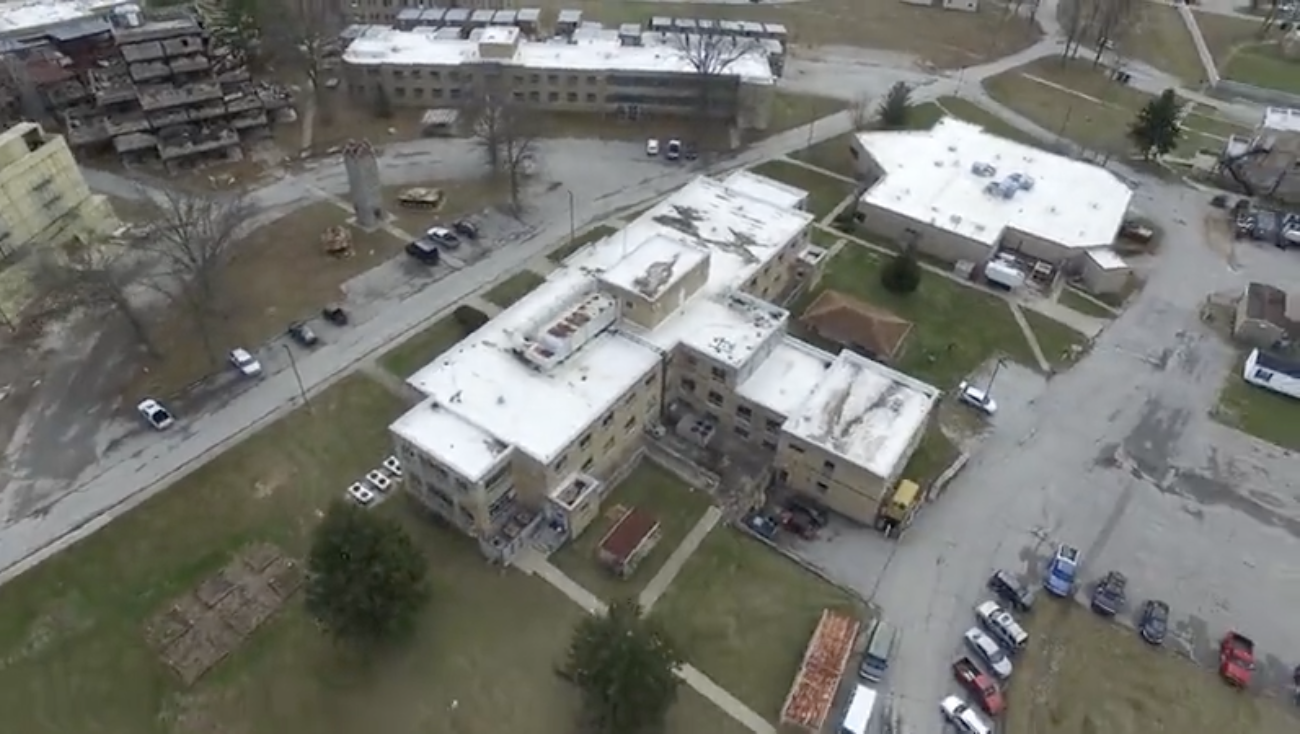